In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
u = sym.Symbol('u', real=True)
sigma = sym.Symbol('sigma', real=True)
x = sym.Symbol('x', real=True)

In [3]:
pi = np.pi

In [4]:
gauss_distribution = (1/(sigma*np.sqrt(2*pi)))*sym.exp(-1*((x-u)**2)/(2*sigma**2))

In [5]:
gauss_distribution

0.398942280401433*exp(-(-u + x)**2/(2*sigma**2))/sigma

In [20]:
def joint_probability(data, distribution):
    P = 1
    for i in range(len(data)):
        xi = data[i]
        pi = distribution.subs(x,xi)
        P = P*pi
    return P

def get_max(F, y):
    m = sym.solveset(sym.Eq(sym.diff(F,y), 0), y)
    return abs(m.args[0])

def plot_MLE_distribution(data, distribution, var):
    """Plots the MLE distribution and returns the value of the maximum liklihood estimate"""
    P = joint_probability(data, distribution)
    G = distribution
    for i in range(len(var)):
        v = var[i]
        V = get_max(P, v)
        P = P.subs(v,V)
        G = G.subs(v,V)

    s = abs(data[-1] - data[0])
    X = np.linspace(data[0]-s, data[-1]+s,50)
    Y = []
    for i in X:
        Y.append(G.evalf(subs={x:i}))
    Y2 = []
    for d in range(len(data)):
        Y2.append(0)

    m = get_max(G, x)

    print(X)
    print(Y)

    plt.plot(X,Y)
    plt.scatter(data,Y2, marker='o', c='red')
    plt.scatter(m,0, marker='x', c='green')
    plt.title('Maximum Liklihood estimation')
    plt.show()
    
    return m

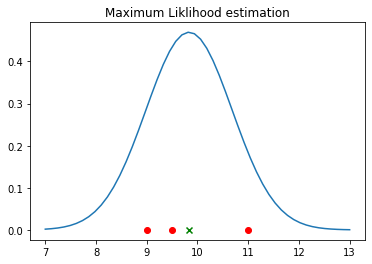

9.83333333333334


In [7]:
data = [9,9.5,11]
m = plot_MLE_distribution(data, gauss_distribution, [u, sigma]) 
print(m)

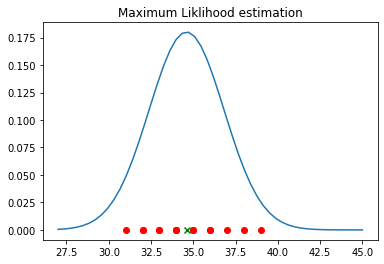

34.6000000000000


In [8]:
data = [33,34,35,36,34,34,35,36,37,38,32,32,33,31,39]
m = plot_MLE_distribution(data, gauss_distribution, [u, sigma])
print(m)

In [13]:
poiss_distribution = (u**x)*sym.exp(-1*u)/sym.factorial(x)
print(poiss_distribution)

u**x*exp(-u)/factorial(x)


In [16]:
data = []
for i in range(20):
    data.append(np.random.poisson(5))
print(data)

[1, 5, 5, 2, 9, 2, 3, 3, 1, 3, 8, 8, 2, 9, 9, 4, 4, 5, 2, 4]


In [25]:
m = plot_MLE_distribution(data, poiss_distribution, [u])

ValueError: gamma function pole

In [27]:
joint_probability(data, poiss_distribution)

u**89*exp(-20*u)/6413296852547471603283609098649600000000